# Problem 1:

## a: NLP 
**Please discuss the recent trend of rapidly increasing sizes of NLP architectures.**

Recent NLP Research shows a scaling paradigm, where larger models consistently holds better generalization, reasoning and few-shot learning capabilities.

This trend Started with Transformer Based Architectures (2017), leading to exponential growth in model sizes, from millions to hundreds of billions of parameters within a few years. (GPT-4 with 1T parameters in 2024).
Larger models can capture more complex patterns in data, leading to better performance on a variety of NLP tasks.[1](https://arxiv.org/abs/2001.08361)

However, this trend also raises concerns about the environmental impact of training such large models, as well as issues related to accessibility and fairness in AI.

Due to concerns in *computer/environmental* costs and *diminishing returns*, the field moved from "just bigger is better" to "bigger and more efficient", with smart trade-offs in architecture and training strategies to mitigate the downsides of scale.[2](https://aclanthology.org/2025.acl-long.1163.pdf)

## b: Transfer Learning
**Classify the following example of transfer learning. More exactly, what are the domains and tasks, and which are being changed?**

- **Source:** Using a step counter to monitor exercise in healthy people.

- **Target:** Using a step counter to indicate recovery progression in a patient.

| Aspect                                       | Source                         | Target                                                             | Changed?         |
| -------------------------------------------- | ------------------------------ | ------------------------------------------------------------------ | ---------------- |
| **Domain (input space + data distribution)** | Healthy individuals’ step data | Patients’ step data (different gait, frequency, recovery patterns) | ✅ Domain changed |
| **Task (objective function)**                | Monitor daily exercise         | Assess recovery progression                                        | ✅ Task changed   |

#### Classification:

- **Source domain:** Healthy individuals’ step data, which is characterized by a certain range of step counts, patterns, and activity levels.
- **Target domain:** Patients’ step data, which may exhibit different characteristics due to factors like injury, recovery status, and rehabilitation progress.
- **Source task:** Monitoring daily exercises, which involve tracking step counts and activity levels to provide feedback on physical activity in healthy people. 
- **Target task:** Assessing recovery progression, which involves analyzing step data to evaluate how well a patient is recovering, potentially requiring different metrics and interpretations compared to monitoring exercise in healthy individuals.

- **Domain change:** $DS ≠ DT$ (healthy people vs patients)→ space/distribution changed.
- **Task change:** $TS ≠ TT$ (monitoring exercise vs assessing recovery)→ label/decision changed.

Since both domain and task differs, this is an **inductive transfer-learning** scenario (source task $≠$ target task) with domain shift.

## c: Attention

Assume dotproduct attention, and that the hidden states of the encoder layer are **[0,1,4],[-1,1,2],[1,1,1],[2,1,1]**. If the activation for the previous decoder is **[0.1,1,-2]**

#### what is the attention-context vector?
Given keys (K_i) and query (q):

Keys:
$(K_1=[0,1,4]), (K_2=[-1,1,2]), (K_3=[1,1,1]), (K_4=[2,1,1])$
Query: $(q=[0.1,1,-2])$

1. Dot scores: $(s_i = K_i \cdot q)$
   $([s_1,s_2,s_3,s_4] = [-7.0,\ -3.1,\ -0.9,\ -0.8])$

2. Softmax weights: $(a_i = \frac{e^{s_i}}{\sum_j e^{s_j}})$
   $([a_1,a_2,a_3,a_4] \approx [0.001011,\ 0.049951,\ 0.450813,\ 0.498225])$

3. Attention (context) vector: $(c=\sum_i a_i K_i)$
   $(c \approx [1.397,\ 1.0,\ 1.053])$

So the attention-context vector $c \approx [1.397, 1.0, 1.053]$.


## d: Transformers
**Explain the 'positional encoding' step for transformers.**

#### Why is it done, how is it done?
Transformers don't process input tokens sequentially like RNNs, they see all tokens at once using self-attention. Since attention has no inherent notion of order, the model would tread a sentence like "chat we must" the same as "we must chat".
To inject information about the token positions into the model, positional encoding is added so the model can understand sequence order.

**This is how its done:**

Positional encoding is added as a fixed positional tensor $P_i$ to the token embeddings before they're fed into the Transformer layers:

$[z_i = x_i + p_i]$

where (x_i) is the word embedding and (p_i) is the positional encoding vector for position (i).

The **original Transformer (Vaswani et al., 2017)** used **sinusoidal functions** so positions could be generalized to unseen lengths:

$[PE_{(pos,2i)} = \sin(pos / 10000^{2i/d_{model}})]$
$[PE_{(pos,2i+1)} = \cos(pos / 10000^{2i/d_{model}})]$

This creates a continuous encoding pattern where 'pos' runs along the sequence and 'i' indexes the input dimensions. Usually, the encoding is only added to the first few (4) dimensions.


## e: Bounding box detection:
**Given a dataset with two classes; cats and dogs, and the following detections:**

TP = True positive
FP = False positive
cat_det = [TP, FP, TP, FP, TP]
pred_scores_cat = [0.7, 0.3, 0.5, 0.6, 0.5]
dog_det = [FP, TP, TP, FP, TP, TP]
pred_scores_dog = [0.4, 0.3, 0.9, 0.5, 0.6, 0.7]
There are in total 3 cats and 4 dogs in the images.

#### Calculate the mean average precision (mAP)
Using precision-recall analysis, I evaluated detection performance for 2 classes (cats and dogs). Function 'avg_prec' computes average precision (AP) for each class based on true positive (TP) and false positive (FP) detections sorted by confidence scores (descending). eventual mAP is the mean of the APs for both classes. $mAP=(AP_{cat}+AP_{dog})/2$

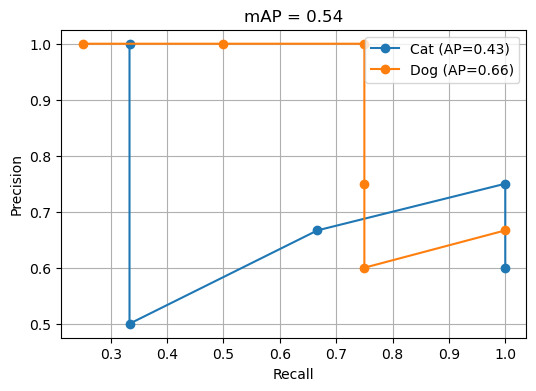

(0.4305555555555555, 0.6583333333333333, 0.5444444444444444)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# given data 
cat_det = np.array(["TP", "FP", "TP", "FP", "TP"])
cat_scores = np.array([0.7, 0.3, 0.5, 0.6, 0.5])
n_cats = 3 #cats 

dog_det = np.array(["FP", "TP", "TP", "FP", "TP", "TP"])
dog_scores = np.array([0.4, 0.3, 0.9, 0.5, 0.6, 0.7])
n_dogs = 4 #dogs

def avg_prec(det, scores, n_gt):
    # sort by scores (descending)
    idx = np.argsort(-scores)
    det, scores = det[idx], scores[idx]

    tp = (det == "TP").astype(int)
    fp = (det == "FP").astype(int)

    cum_tp = np.cumsum(tp)
    cum_fp = np.cumsum(fp)

    precision = cum_tp / (cum_tp + cum_fp)
    recall = cum_tp / n_gt

    # Interpolated AP (integration under P-R curve)
    ap = np.trapz(precision, recall)

    return ap, recall, precision

# Compute AP for cats and dogs
ap_cat, r_cat, p_cat = avg_prec(cat_det, cat_scores, n_cats)
ap_dog, r_dog, p_dog = avg_prec(dog_det, dog_scores, n_dogs)
mAP = (ap_cat + ap_dog) / 2

# --- Plot Precision-Recall curves ---
plt.figure(figsize=(6, 4))
plt.plot(r_cat, p_cat, marker='o', label=f'Cat (AP={ap_cat:.2f})')
plt.plot(r_dog, p_dog, marker='o', label=f'Dog (AP={ap_dog:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'mAP = {mAP:.2f}')
plt.legend()
plt.grid(True)
plt.show()

ap_cat, ap_dog, mAP


## f: Semantic segmentation - FCN 1:
**Given an image sized 1024x768x3 (width x height x channels), with 7 classes.** 

#### What is the size of the target image if targets are one-hot encoded?
One-hot encoding means: 
- for each pixel, instead of a single integer '(0-6)', we store a vector of length 7.
- Each vector has '1' for the correct class and '0' for all others.

So the size of the target image is: 
Target Shape = (width, height, num_classes) = **(1024, 768, 7)**


## g: Semantic segmentation - FCN 2: 
#### What is a fully-convolutional network? When is it useful?
Fully Convolutional Networks (FCNs) are CNNs that have been modified for image segmentation rather than classification. Unlike traditional CNNs that output a single class prediction, FCNs generate a corresponding segmentation map with the same spatial resolution as the input image. [3](https://datature.io/blog/supporting-fully-convolutional-networks-and-u-net-for-image-segmentation#:~:text=Fully%20Convolutional%20Networks%20(FCNs)%20are%20CNNs%20that%20have%20been%20modified%20for%20image%20segmentation%20rather%20than%20classification.)

They are useful in tasks where **pixel-level** classification is required, such as medical image analysis, autonomous driving, and scene understanding, where localization and classification must be done simultaneously.


## h:Residual Networks:
#### Explain residual layers and their advantage.
A residual Layer or block is a building unit of Residual networks (ResNets), that learns a residual function $F(x)$ with respect to the input x instead of learning a full mapping $H(x)$: $H(x) = F(x) + x$. 

This allows gradients to flow directly through the skip connections, reducing degradation when networks grow very deep.

**Advantages:**
- **Easier Optimization:** Network learn modifications to identity rather than entire mappings. 
- **Prevents Vanishing Gradients:** Gradients can bypass multiple layers.
- **Enables Deeper Networks:** ResNet-152, ResNeXt, EfficientNet, and Vision Transformers use similar principles. 
- **Better Generalization:** Empirically shown to improve performance on various tasks.

## i: Intersection-Over-Union
**Calculate the intersection over union in for these four bounding-boxes and target bounding boxes:**

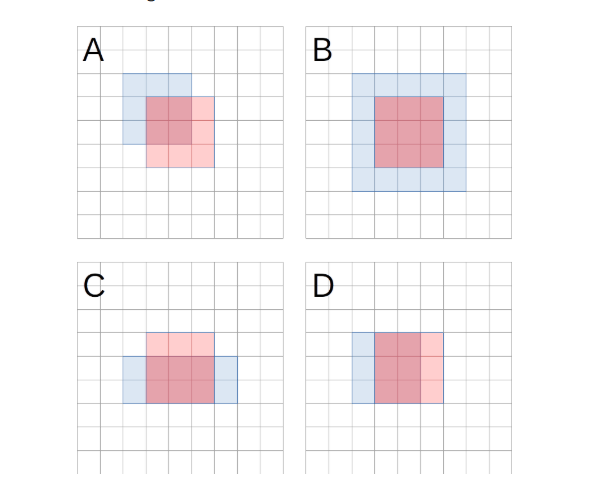

The IoU for the bounding boxes are calculated using this formula: 

$$IoU = \frac{Area_{Intersection of two boxes}}{Area_{Union of two boxes}}$$



| Example | Target (AT) Dimensions & Area | Predicted (AP) Dimensions & Area | Intersection $(A∩)$ Dimensions & Area | Union $(A∪)$ Area | IoU $(A∩ / A∪)$ |
|:--------:|:------------------------------:|:--------------------------------:|:-----------------------------------:|:----------------:|:---------------:|
| **A** | 3×3 = **9** | 3×3 = **9** | 2×2 = **4** | 9 + 9 − 4 = **14** | 4 / 14 ≈ **0.286** |
| **B** | 3×3 = **9** | 5×5 = **25** | 3×3 = **9** | 9 + 25 − 9 = **25** | 9 / 25 = **0.360** |
| **C** | 3×3 = **9** | 5×2 = **10** | 3×2 = **6** | 9 + 10 − 6 = **13** | 6 / 13 ≈ **0.462** |
| **D** | 3×3 = **9** | 3×3 = **9** | 2×3 = **6** | 9 + 9 − 6 = **12** | 6 / 12 = **0.500** |


## j: Variational autoencoders:
**What are the strengths of a variational autoencoder (VAE) compared to an autoencoder (AE)?**

Comparing the traditional and variational autoencoders lies in the ability to be a powerful generative model, which is a consequence of how it structures the latent space. 

* VAE is designed to learn a representation in the bottleneck that can be used to generate new samples. 
* VAE model latent variables as probability distribution (e.g., Gaussian) rather than fixed points, allowing for smooth interpolation and sampling.
* Instead of encoding each input into a single, discrete point in the latent space, a VAE encodes the input as a probability distribution. 

# Problem 2: 


### Using the dataset supplied below, create a neural network which can detect the ends of waveforms (marked by '1' in the labels).

As this problem is a sequence labeling task, where the input is a 1D signal over time, the goal is to predict at which time steps a waveform ends (marked by ‘1’ in the labels).
So I will be training a GRU-based sequence model, then evaluate its performance on a test set, and visualize predictions vs. ground truth.

#### Dataset Setup 

The waveformLoader contains batches of waveform sequences and their labels for training, while testX and testy represent the held-out test sequence used for evaluation.

Testing data shapes: torch.Size([1, 5100, 1]) torch.Size([5100, 1])


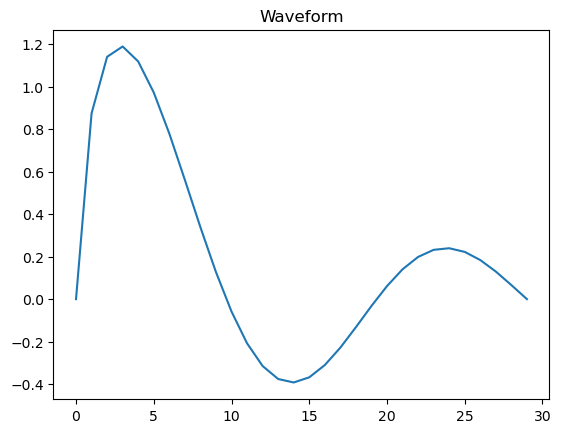

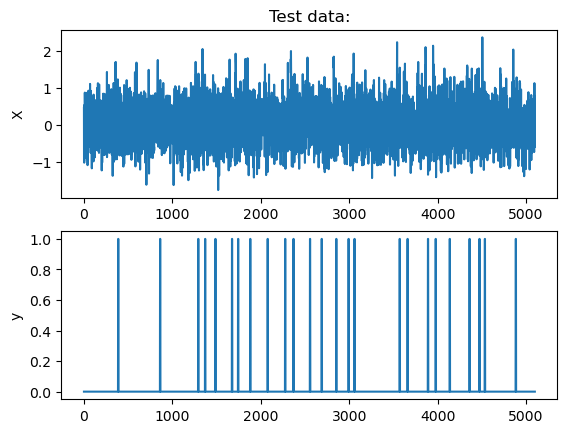

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from dataset_setup import waveformLoader, testX, testy
from sklearn.metrics import precision_score, recall_score

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Testing data shapes:", testX.shape, testy.shape)


#### Preprocessing
Normalizing the input data for numerical stability and ensuring correct shapes for GRU input format (batch, seq_len, features)

In [2]:
# Normalize test set (z-score normalization)
testX = (testX - testX.mean()) / (testX.std() + 1e-8)

if testy.ndim == 1:
    testy = testy.unsqueeze(-1)

print("After normalization:", testX.shape, testy.shape)

After normalization: torch.Size([1, 5100, 1]) torch.Size([5100, 1])


#### Model Definition (GRU Detector)
The GRU Learns how signals evolve and where patterns (waveforms) end. The final layer converts those learned signals into a continuous probability curve that marks the waveform endpoints.
the NN architecture is defined as follows:

| **Layer**                       | **Purpose**                            | **Key Behavior**                                |
| ------------------------------- | -------------------------------------- | ----------------------------------------------- |
| GRU (2 layers, 64 hidden units) | Capture temporal dependencies          | Learns long-term and short-term signal patterns |
| Linear                          | Map temporal features to a scalar      | Converts hidden states to detection scores      |
| BCEWithLogitsLoss               | Combine Sigmoid + Binary Cross-Entropy | Provides stable probability-based training loss |



In [3]:
class WaveformDetectorGRU(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2, bidirectional=True):
        super().__init__()
        self.bidirectional = bidirectional
        self.gru = nn.GRU(
            input_dim, hidden_dim, num_layers=num_layers,
            batch_first=True, dropout=0.2, bidirectional=bidirectional
        )
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, 1)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out)
        return out  

model = WaveformDetectorGRU().to(device)
print(model)


WaveformDetectorGRU(
  (gru): GRU(1, 64, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


With the: 
```python
self.gru = nn.GRU(input_dim, hidden_dim, num_layers=2, batch_first=True, bidirectional=True) 
```

The GRU has two gates:

- **Update gate (zₜ)** → decides how much of the previous memory to keep.
- **Reset gate (rₜ)** → decides how much past information to forget.


The raw output is (batch, seq_len, 1); applying torch.sigmoid() converts it into a ``probability ∈ [0,1]`` for each time step

#### Training Loop
Here I train the model on batches from the waveformLoader, using BCE loss to measure how close predictions are to the binary labels and Adam optimizer for stability.

In [9]:
pos_weight = torch.tensor([10.0]) 
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for X_batch, y_batch in waveformLoader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        avg_train_loss = total_loss / len(waveformLoader)
        print(f"Epoch [{epoch+1}/{epochs}] - Avg Train Loss: {avg_train_loss:.4f}")



Epoch [10/50] - Avg Train Loss: 0.0819
Epoch [20/50] - Avg Train Loss: 0.0551
Epoch [30/50] - Avg Train Loss: 0.0402
Epoch [40/50] - Avg Train Loss: 0.0444
Epoch [50/50] - Avg Train Loss: 0.0375


#### Evaluation
After inference, the model’s raw logits are passed through a sigmoid to obtain probabilities of waveform endings. The plot compares predicted probabilities (orange) against true waveform endpoints (blue) over time

Average Test Loss: 0.095278


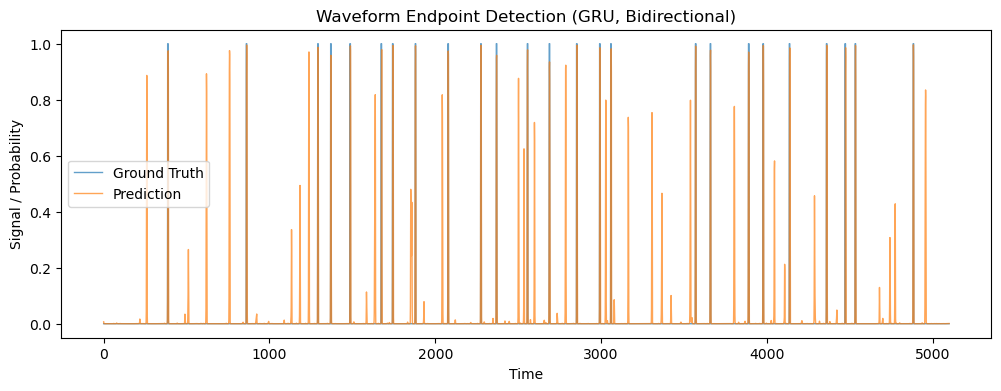

In [12]:
model.eval()
with torch.no_grad():
    logits = model(testX)
    pred = torch.sigmoid(logits)  # convert to probabilities
    test_loss = criterion(logits, testy.unsqueeze(0)).item()

print(f"Average Test Loss: {test_loss:.6f}")

plt.figure(figsize=(12,4))
plt.plot(testy.squeeze().detach().cpu(), label='Ground Truth', linewidth=1, alpha=0.7)
plt.plot(pred.squeeze().detach().cpu(), label='Prediction', linewidth=1, alpha=0.7)
plt.legend()
plt.title('Waveform Endpoint Detection (GRU, Bidirectional)')
plt.xlabel('Time')
plt.ylabel('Signal / Probability')
plt.show()


In [14]:
y_true = testy.cpu().numpy().ravel()
y_pred = (pred.squeeze().cpu().numpy() > 0.5).astype(int)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}")

Precision: 0.537, Recall: 0.880


#### Conclusion 
The bidirectional GRU model successfully learns to detect waveform endpoints. Despite some false positives, the model achieves reasonable precision and recall, showing that it captures temporal dependencies in the waveform. Improvements could include threshold tuning or experimenting with other recurrent architectures (e.g., LSTM)